Details of dataset:

- Sex: male, female
- Age: rounded up to 5 years
- Height: rounded up to 5 cm [cm]
- Weight: [kg]
- Sight_left: eyesight (left)
- Sight_right: eyesight (right)
- Hear_left: hearing left, 1(normal), 2(abnormal)
- Hear_right: hearing right, 1(normal), 2(abnormal)
- SBP: Systolic blood pressure [mmHg]
- DBP: Diastolic blood pressure [mmHg]
- BLDS: BLDS or FSG (fasting blood glucose) [mg/dL]
- tot_chole: total cholesterol [mg/dL]
- HDL_chole: HDL cholesterol [mg/dL]
- LDL_chole: LDL cholesterol [mg/dL]
- Triglyceride: triglyceride [mg/dL]
- Hemoglobin: hemoglobin [g/dL]
- Urine_protein: protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
- Serum_creatinine: serum (blood) creatinine [mg/dL]
- SGOT_AST: SGOT (Glutamate-oxaloacetate transaminase) AST (Aspartate transaminase) [IU/L]
- SGOT_ALT: ALT (Alanine transaminase) [IU/L]
- Gamma_GTP: y-glutamyl transpeptidase [IU/L]
- SMK_stat_type_cd: Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
- DRK_YN: Drinker or Not

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
original_df = pd.read_csv("smoking_driking_dataset_Ver01.csv")
original_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,991346.0,47.614491,14.181339,20.0,35.0,45.0,60.0,85.0
height,991346.0,162.240625,9.282957,130.0,155.0,160.0,170.0,190.0
weight,991346.0,63.284050,12.514241,25.0,55.0,60.0,70.0,140.0
waistline,991346.0,81.233358,11.850323,8.0,74.1,81.0,87.8,999.0
sight_left,991346.0,0.980834,0.605949,0.1,0.7,1.0,1.2,9.9
sight_right,991346.0,0.978429,0.604774,0.1,0.7,1.0,1.2,9.9
hear_left,991346.0,1.031495,0.174650,1.0,1.0,1.0,1.0,2.0
hear_right,991346.0,1.030476,0.171892,1.0,1.0,1.0,1.0,2.0
SBP,991346.0,122.432498,14.543148,67.0,112.0,120.0,131.0,273.0
DBP,991346.0,76.052627,9.889365,32.0,70.0,76.0,82.0,185.0


In [4]:
def preprocess_df(file_path):
    df = pd.read_csv(file_path)
    df = df.drop_duplicates()

    columns_to_exclude_max = ['sight_left', 'sight_right', 'SGOT_AST', 'gamma_GTP']
    for column in columns_to_exclude_max:
        df = df[df[column] != df[column].max()]

    sus_columns = ['waistline', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'serum_creatinine', 'SGOT_AST',
                   'SGOT_ALT', 'gamma_GTP', 'hemoglobin']

    # Initialize a mask to select all rows initially
    mask = pd.Series([True] * df.shape[0])

    for column in sus_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the bounds for the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Update the mask to identify rows that are not outliers in the current column
        mask = mask & (df[column] >= lower_bound) & (df[column] <= upper_bound)

    # Apply the mask to filter out the outliers
    df = df[mask]

    df['BMI'] = df['weight'] / ((df['height'] / 100) ** 2)
    df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 25, 30, float('inf')], labels=['0', '1', '2', '3'])
    df['MAP'] = df['DBP'] + (df['SBP'] - df['DBP']) / 3
    df['Liver_Enzyme_Ratio'] = df['SGOT_AST'] / df['SGOT_ALT']
    df['Anemia_Indicator'] = (df['hemoglobin'] < 12).astype(int)

    smoker_type_mapping = {1.0: 'Non-Smoker', 2.0: 'Former Smoker', 3.0: 'Current Smoker'}
    df['Smoker Type'] = df['SMK_stat_type_cd'].map(smoker_type_mapping)
    
    label_encoder = LabelEncoder()
    categorical_columns = ['sex','DRK_YN']  #1:male, 1:Y

    # Apply label encoding to each categorical column

    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    columns_to_convert = ['sex','DRK_YN', 'SMK_stat_type_cd', 'urine_protein', 'hear_left', 'hear_right', 'Anemia_Indicator']
    df[columns_to_convert] = df[columns_to_convert].astype('int')
    df[columns_to_convert] = df[columns_to_convert].astype('category')

    return df

In [5]:
# Importing data
processed_df = preprocess_df("smoking_driking_dataset_Ver01.csv")
processed_df.head(10)

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,BMI,BMI_Category,MAP,Liver_Enzyme_Ratio,Anemia_Indicator,Smoker Type
0,1,35,170,75,90.0,1.0,1.0,1,1,120.0,...,35.0,40.0,1,1,25.951557,2,93.333333,0.600000,0,Non-Smoker
1,1,30,180,80,89.0,0.9,1.2,1,1,130.0,...,36.0,27.0,3,0,24.691358,1,98.000000,0.555556,0,Current Smoker
3,1,50,175,80,91.0,1.5,1.2,1,1,145.0,...,34.0,18.0,1,0,26.122449,2,106.333333,0.852941,0,Non-Smoker
4,1,50,165,60,80.0,1.0,1.2,1,1,138.0,...,12.0,25.0,1,0,22.038567,1,100.666667,1.583333,0,Non-Smoker
5,1,50,165,55,75.0,1.2,1.5,1,1,142.0,...,40.0,37.0,3,1,20.202020,1,108.666667,0.725000,0,Current Smoker
6,0,45,150,55,69.0,0.5,0.4,1,1,101.0,...,12.0,12.0,1,0,24.444444,1,72.333333,1.583333,0,Non-Smoker
7,1,35,175,65,84.2,1.2,1.0,1,1,132.0,...,18.0,35.0,3,1,21.224490,1,97.333333,1.000000,0,Current Smoker
8,1,55,170,75,84.0,1.2,0.9,1,1,145.0,...,23.0,26.0,1,1,25.951557,2,105.000000,1.391304,0,Non-Smoker
9,1,40,175,75,82.0,1.5,1.5,1,1,132.0,...,38.0,16.0,2,1,24.489796,1,114.000000,0.552632,0,Former Smoker
10,1,45,155,55,79.2,1.0,1.0,1,1,118.0,...,14.0,19.0,1,0,22.892820,1,86.000000,1.357143,0,Non-Smoker


In [6]:
# missing values
processed_df.isnull().sum()

sex                   0
age                   0
height                0
weight                0
waistline             0
sight_left            0
sight_right           0
hear_left             0
hear_right            0
SBP                   0
DBP                   0
BLDS                  0
tot_chole             0
HDL_chole             0
LDL_chole             0
triglyceride          0
hemoglobin            0
urine_protein         0
serum_creatinine      0
SGOT_AST              0
SGOT_ALT              0
gamma_GTP             0
SMK_stat_type_cd      0
DRK_YN                0
BMI                   0
BMI_Category          0
MAP                   0
Liver_Enzyme_Ratio    0
Anemia_Indicator      0
Smoker Type           0
dtype: int64

In [7]:
processed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,724776.0,47.010366,14.399118,20.000000,35.000000,45.000000,55.000000,85.00000
height,724776.0,161.674766,9.242342,130.000000,155.000000,160.000000,170.000000,190.00000
weight,724776.0,61.529024,11.528390,25.000000,55.000000,60.000000,70.000000,125.00000
waistline,724776.0,79.608775,9.021769,53.800000,73.000000,80.000000,86.000000,107.90000
sight_left,724776.0,0.956170,0.341365,0.100000,0.700000,1.000000,1.200000,2.50000
sight_right,724776.0,0.953283,0.339589,0.100000,0.700000,1.000000,1.200000,2.50000
SBP,724776.0,120.901132,14.184181,70.000000,110.000000,120.000000,130.000000,273.00000
DBP,724776.0,75.073449,9.604236,33.000000,69.000000,75.000000,80.000000,185.00000
BLDS,724776.0,95.050678,11.266278,63.000000,87.000000,94.000000,101.000000,130.00000
tot_chole,724776.0,192.673550,34.186904,94.000000,169.000000,191.000000,215.000000,294.00000


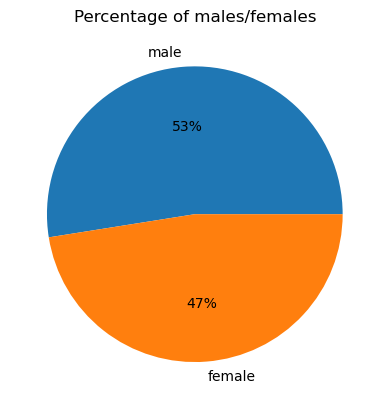

In [8]:
labels = ['male', 'female']
plt.pie(processed_df['sex'].value_counts(), labels=labels, autopct='%.0f%%')
plt.title('Percentage of males/females')
plt.show()

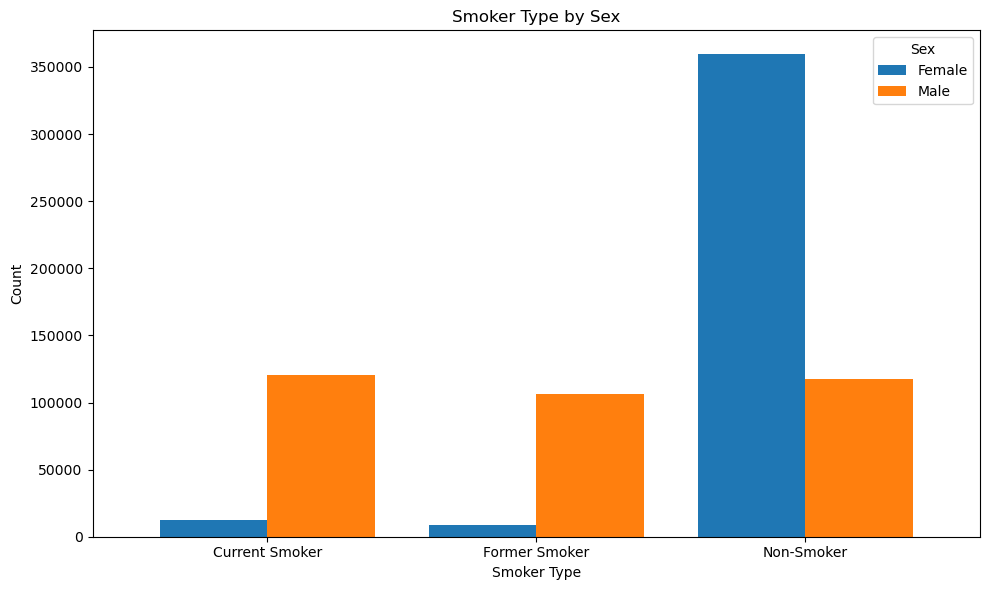

In [9]:
smoker_sex_distribution = pd.crosstab(processed_df['Smoker Type'], processed_df['sex'])

# Plot
smoker_sex_distribution.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Smoker Type by Sex')
plt.xlabel('Smoker Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Sex', labels=['Female', 'Male'])  # Labels can be adjusted according to your data
plt.tight_layout()

plt.show()

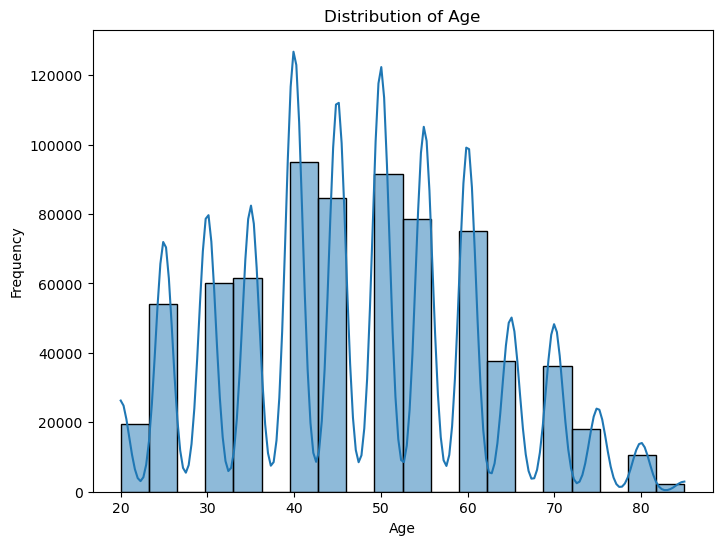

In [10]:
plt.figure(figsize=(8, 6)) 

sns.histplot(data=processed_df, x='age', kde=True, bins=20)  

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

# Display the plot
plt.show()  

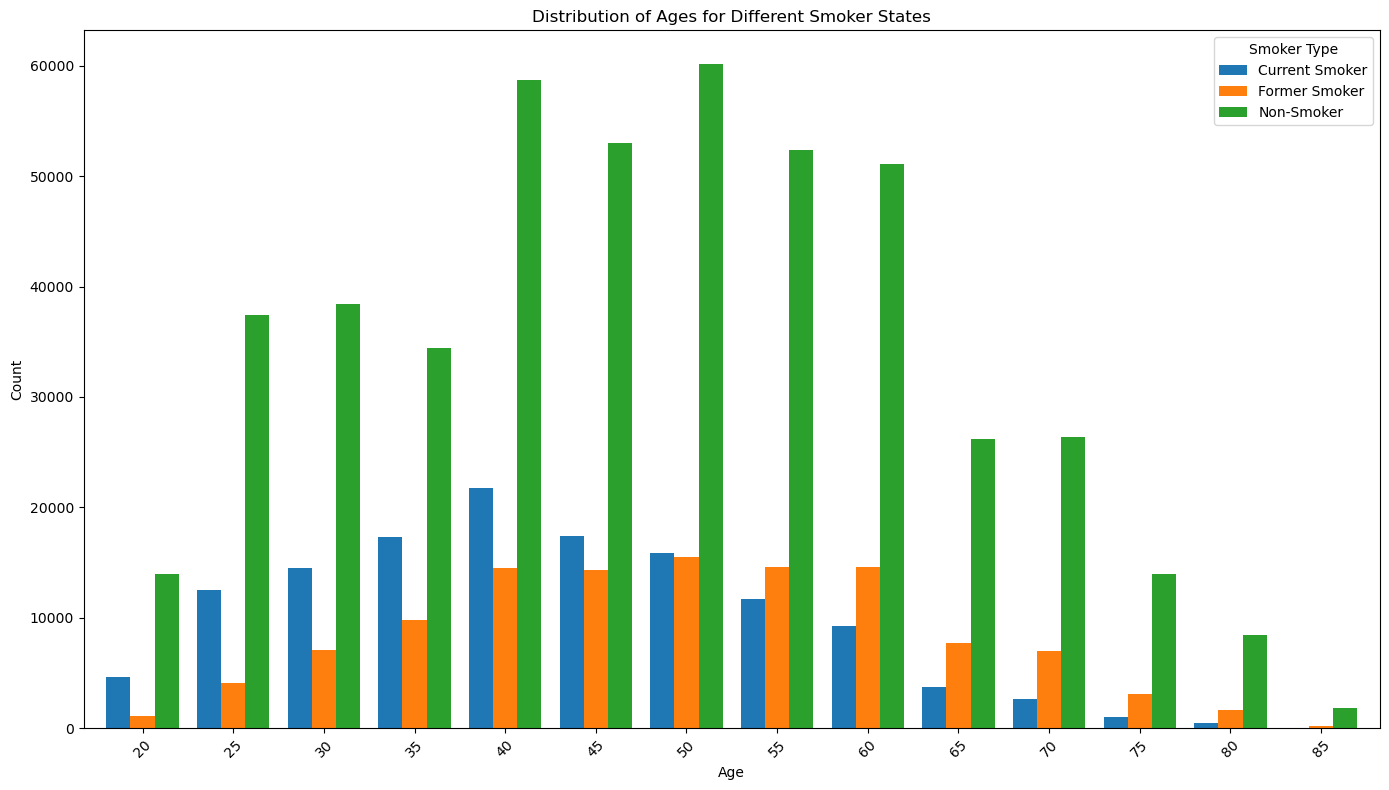

In [11]:
# Group the data by 'Smoker Type' and 'age', then count the occurrences
age_distribution = processed_df.groupby(['Smoker Type', 'age']).size().reset_index(name='Count')

# Pivot the data for plotting
age_distribution_pivot = age_distribution.pivot(index='age', columns='Smoker Type', values='Count').fillna(0)

# Plot
age_distribution_pivot.plot(kind='bar', figsize=(14, 8), width=0.8)
plt.title('Distribution of Ages for Different Smoker States')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.legend(title='Smoker Type')
plt.tight_layout()

plt.show()

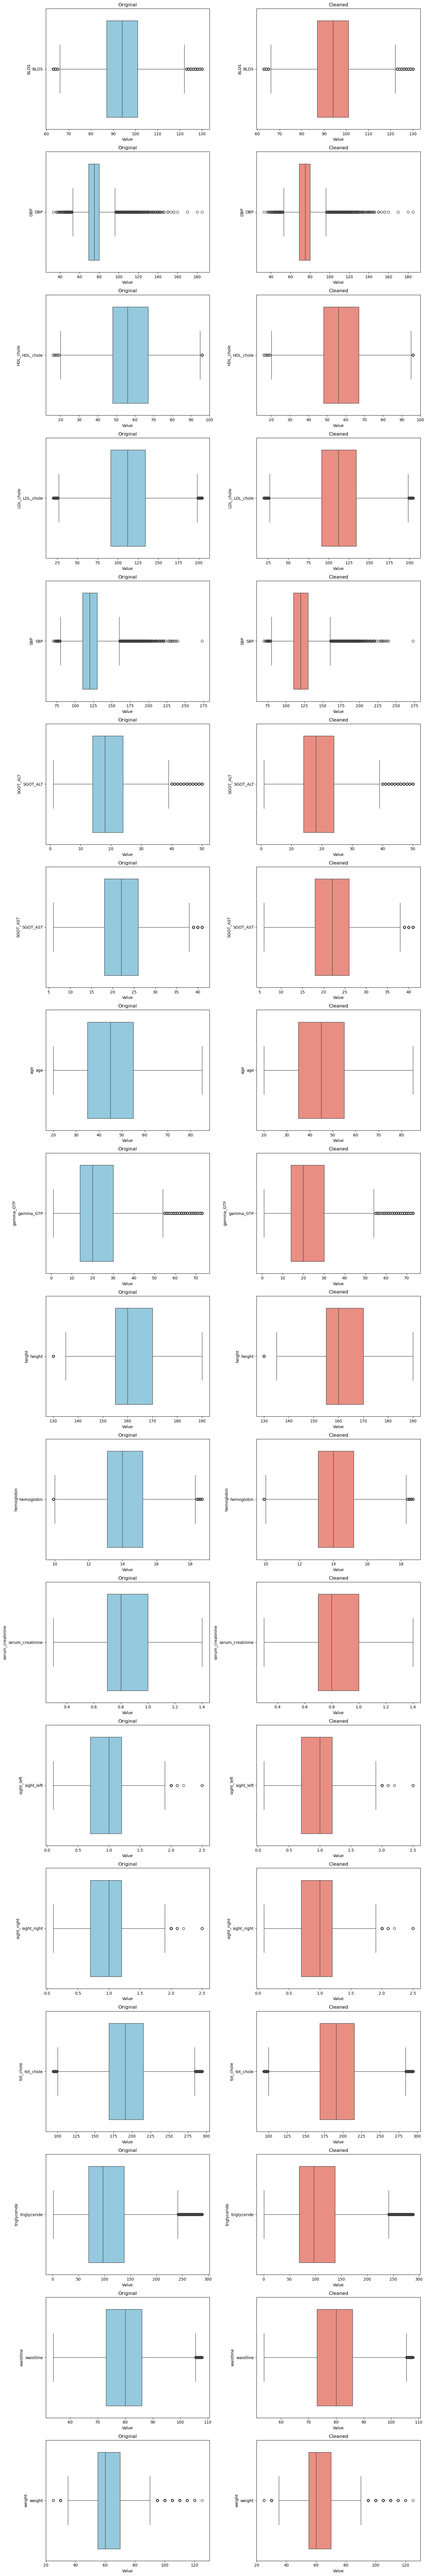

In [12]:
excluded_columns = ['sex', 'DRK_YN', 'SMK_stat_type_cd', 'hear_left', 'hear_right', 'urine_protein']
columns_to_check = original_df.select_dtypes(include=['number']).columns.difference(excluded_columns)

num_rows = len(columns_to_check)
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, column in enumerate(columns_to_check):
    sns.boxplot(data=[original_df[column], processed_df[column]], ax=axes[i, 0], color='skyblue', orient='h')
    sns.boxplot(data=[original_df[column], processed_df[column]], ax=axes[i, 1], color='salmon', orient='h')

    axes[i, 0].set_ylabel(column)
    axes[i, 0].set_xlabel("Value")
    axes[i, 1].set_ylabel(column)
    axes[i, 1].set_xlabel("Value")

    axes[i, 0].set_title("Original")
    axes[i, 1].set_title("Cleaned")

    axes[i, 0].set_xlim(axes[i, 1].get_xlim())  # Make sure x-axis limits match
    axes[i, 1].set_xlim(axes[i, 0].get_xlim())  # Make sure x-axis limits match

for i in range(num_rows):
    for j in range(2, num_cols):
        fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

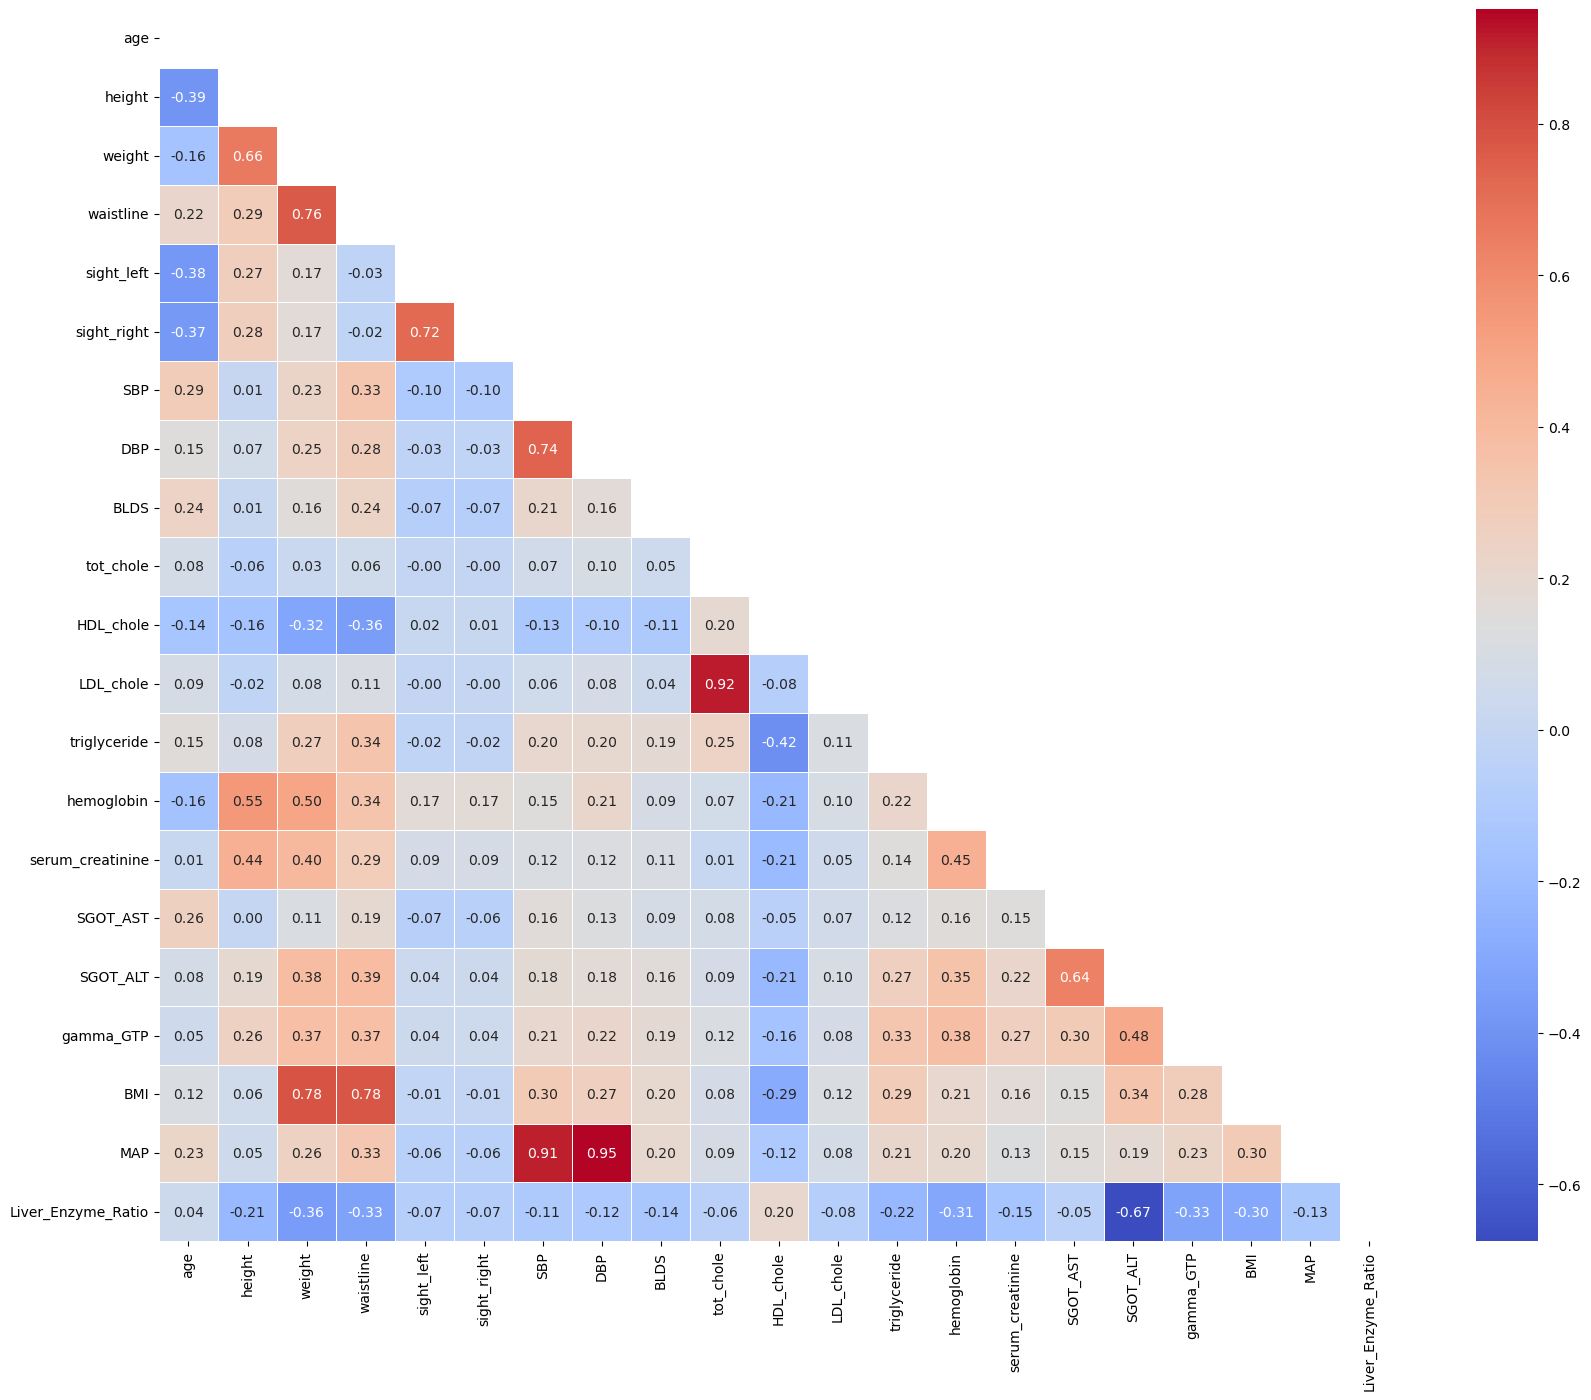

In [13]:
correlation_matrix = processed_df.corr()

mask = np.triu(correlation_matrix)

plt.figure(figsize=(20, 16))
sns.heatmap(
    correlation_matrix, cmap="coolwarm", linewidth=0.5, annot=True, fmt=".2f", mask=mask
)
plt.show()

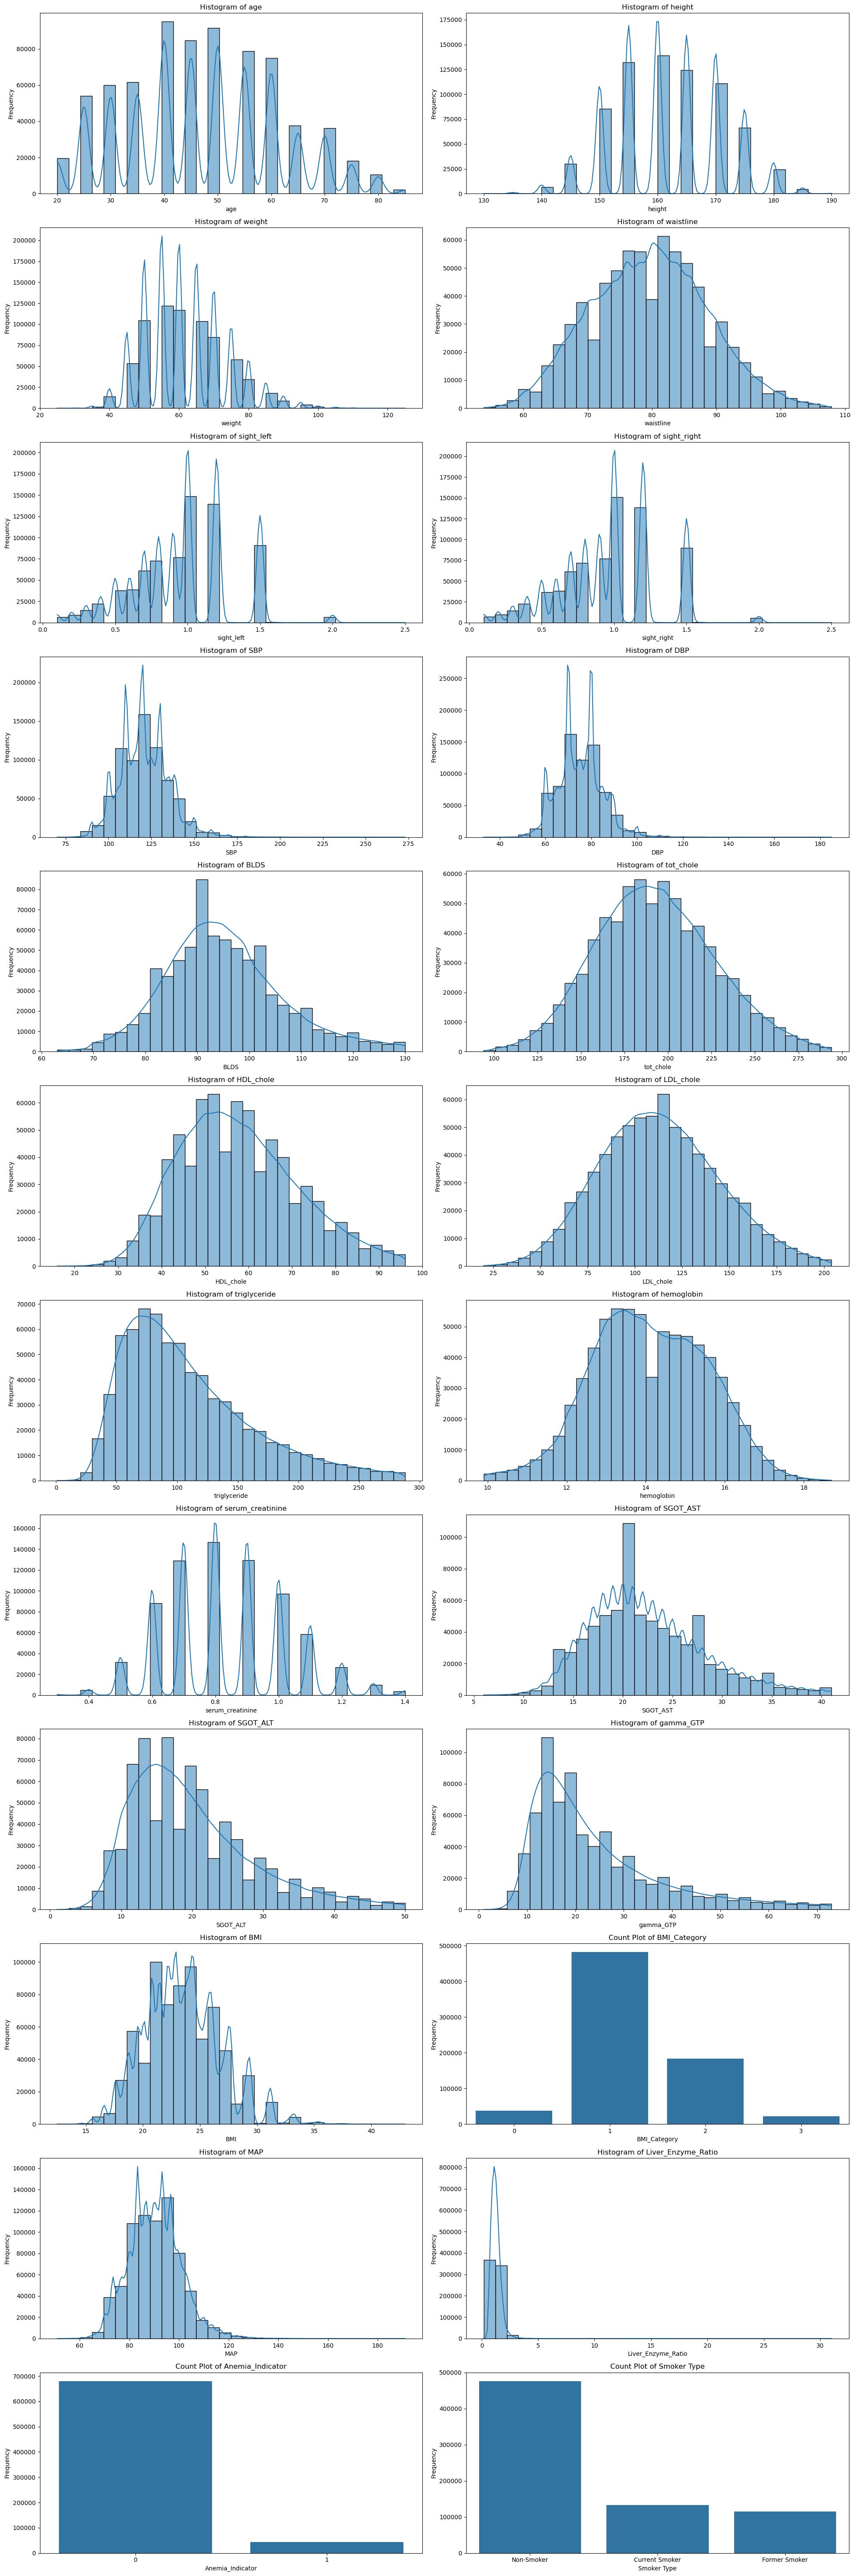

In [15]:
def plot_all_histograms(dataframe):
    columns = dataframe.columns  # Get all column names
    num_columns = len(columns)
    rows = (num_columns + 1) // 2 if num_columns > 2 else 1  # Ensure at least one row
    cols = 2 if num_columns > 1 else 1  # Use two columns if more than one histogram to plot
    
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 5*rows))  # Adjust figsize as needed
    
    for i, column in enumerate(columns):
        # Calculate current row and column position
        row = i // cols
        col = i % cols
        
        # Plot on the appropriate subplot
        if rows > 1:
            ax = axes[row, col]
        else:
            ax = axes[col] if num_columns > 1 else axes  # Adjust for 1 or 2 columns
        
        # Use histplot for numerical data and countplot for categorical data
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            sns.histplot(dataframe[column], ax=ax, kde=True, bins=30)  # KDE for smooth distribution curve
            ax.set_title(f"Histogram of {column}")
        else:
            sns.countplot(x=dataframe[column], ax=ax)
            ax.set_title(f"Count Plot of {column}")
        
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

plot_all_histograms(processed_df.drop(columns=['sex', 'DRK_YN', 'SMK_stat_type_cd', 'hear_left', 'hear_right', 'urine_protein']))